In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = sns.load_dataset('titanic')
print("original data (first 5 rows):\n", df.head())

num_cols = ['age', 'fare', 'sibsp', 'parch']
cat_cols = ['sex', 'class', 'embark_town', 'who']

original data (first 5 rows):
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:


imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
print("\nnumerical data after imputation (first 5 rows):\n", df[num_cols].head())


numerical data after imputation (first 5 rows):
     age     fare  sibsp  parch
0  22.0   7.2500    1.0    0.0
1  38.0  71.2833    1.0    0.0
2  26.0   7.9250    0.0    0.0
3  35.0  53.1000    1.0    0.0
4  35.0   8.0500    0.0    0.0


In [4]:
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))
print("\ncategorical data after encoding (first 5 rows):\n", df[cat_cols].head())



categorical data after encoding (first 5 rows):
    sex  class  embark_town  who
0    1      2            2    1
1    0      0            0    2
2    0      2            2    2
3    0      0            2    2
4    1      2            2    1


In [5]:
X = df[num_cols + cat_cols]
print("\nfinal feature set before scaling (first 5 rows):\n", X.head())



final feature set before scaling (first 5 rows):
     age     fare  sibsp  parch  sex  class  embark_town  who
0  22.0   7.2500    1.0    0.0    1      2            2    1
1  38.0  71.2833    1.0    0.0    0      0            0    2
2  26.0   7.9250    0.0    0.0    0      2            2    2
3  35.0  53.1000    1.0    0.0    0      0            2    2
4  35.0   8.0500    0.0    0.0    1      2            2    1


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\ndata after standardization (first 5 rows):\n", X_scaled[:5])


data after standardization (first 5 rows):
 [[-0.5924806  -0.50244517  0.43279337 -0.47367361  0.73769513  0.82737724
   0.58111394 -0.3552422 ]
 [ 0.63878901  0.78684529  0.43279337 -0.47367361 -1.35557354 -1.56610693
  -1.93846038  1.32837909]
 [-0.2846632  -0.48885426 -0.4745452  -0.47367361 -1.35557354  0.82737724
   0.58111394  1.32837909]
 [ 0.40792596  0.42073024  0.43279337 -0.47367361 -1.35557354 -1.56610693
   0.58111394  1.32837909]
 [ 0.40792596 -0.48633742 -0.4745452  -0.47367361  0.73769513  0.82737724
   0.58111394 -0.3552422 ]]


In [7]:

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)


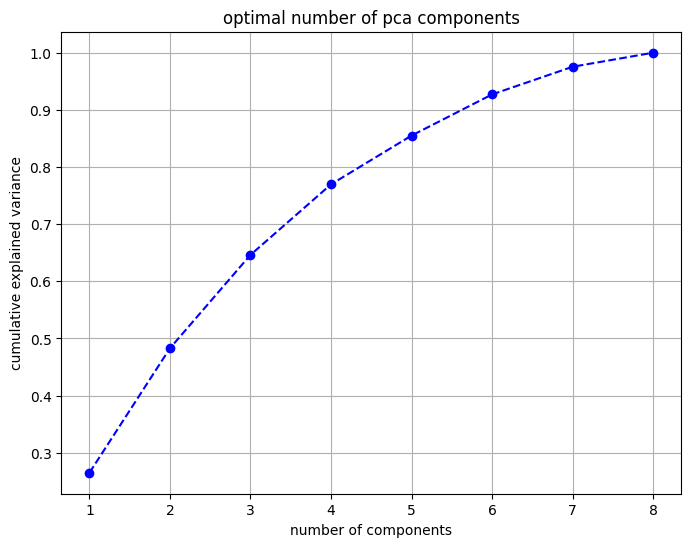

In [8]:

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('optimal number of pca components')
plt.grid()
plt.show()


In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("\npca transformed data (first 5 rows):\n", X_pca[:5])


pca transformed data (first 5 rows):
 [[-1.4701766   0.0515085   0.15839045]
 [ 2.90868388 -0.10756235 -0.15660213]
 [ 0.37452121 -0.2127844   2.18520524]
 [ 2.10362788 -0.02542022  0.64064496]
 [-1.12815647 -0.89494528  0.16772813]]


In [10]:
explained_variance = pca.explained_variance_ratio_
print("\nexplained variance ratio:", explained_variance)
print("cumulative explained variance:", np.cumsum(explained_variance))


explained variance ratio: [0.2649219  0.21788697 0.1633852 ]
cumulative explained variance: [0.2649219  0.48280887 0.64619407]


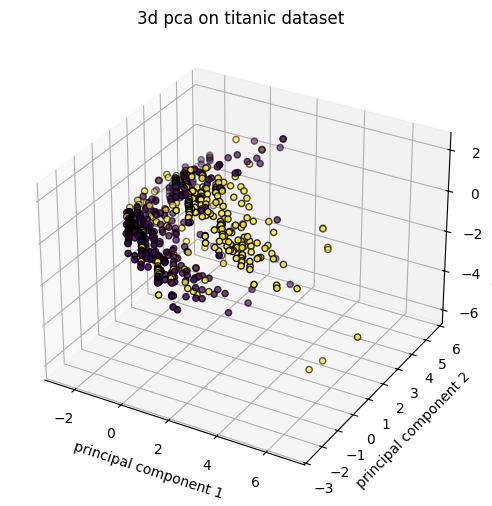

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['survived'], cmap='viridis', edgecolor='k')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('3d pca on titanic dataset')
plt.show()


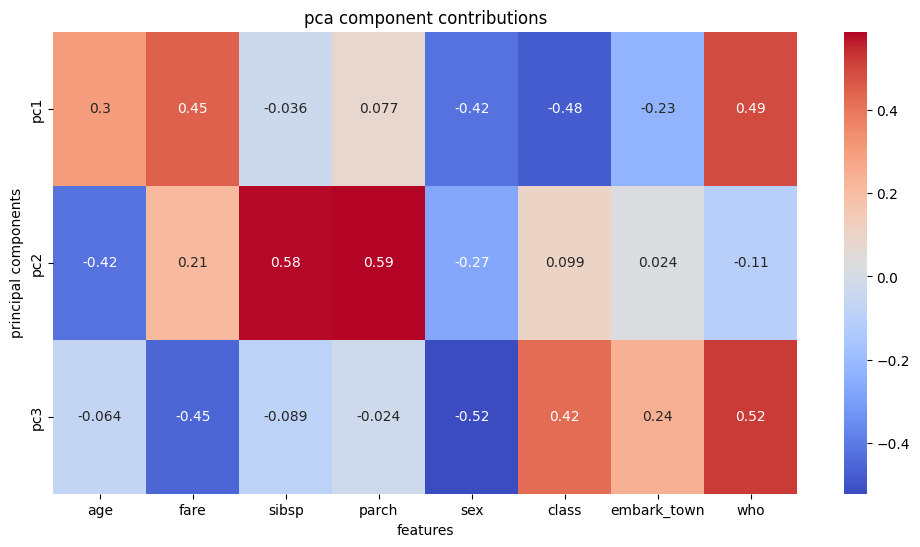

In [12]:

components = pca.components_
plt.figure(figsize=(12, 6))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=num_cols + cat_cols, yticklabels=["pc1", "pc2", "pc3"])
plt.title('pca component contributions')
plt.xlabel('features')
plt.ylabel('principal components')
plt.show()


In [13]:


def reconstruct_pca(X_original, pca_model, n_components):
    X_pca_reduced = pca_model.transform(X_original)
    X_reconstructed = pca_model.inverse_transform(X_pca_reduced)
    return X_reconstructed

X_reconstructed = reconstruct_pca(X_scaled, pca, 3)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
print("\npca reconstruction error:", reconstruction_error)


pca reconstruction error: 0.3538059260842828


In [14]:

kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)
print("\nkernel pca transformed data (first 5 rows):\n", X_kpca[:5])

def print_pca_summary():
    print("\nfinal pca analysis summary:")
    print("original features:", num_cols + cat_cols)
    print("reduced to 3 principal components")
    print("explained variance ratio:", explained_variance)
    print("cumulative variance explained:", np.cumsum(explained_variance))
    print("reconstruction error:", reconstruction_error)


kernel pca transformed data (first 5 rows):
 [[-0.43078411  0.12281     0.12999693]
 [ 0.57925353 -0.1268921   0.00664626]
 [ 0.2453823   0.6326156  -0.10349907]
 [ 0.50985497  0.11040088 -0.38031074]
 [-0.49341595  0.0792245  -0.06504165]]


In [15]:


print_pca_summary()


final pca analysis summary:
original features: ['age', 'fare', 'sibsp', 'parch', 'sex', 'class', 'embark_town', 'who']
reduced to 3 principal components
explained variance ratio: [0.2649219  0.21788697 0.1633852 ]
cumulative variance explained: [0.2649219  0.48280887 0.64619407]
reconstruction error: 0.3538059260842828
